Constructs map to help verify geographic spread of weather stations

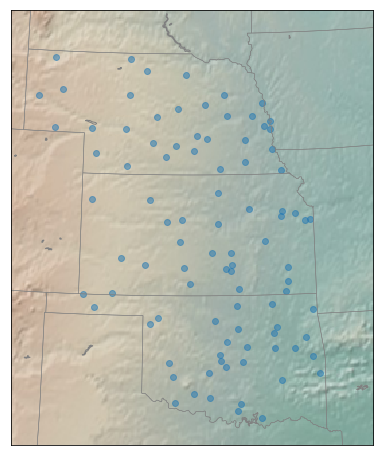

In [7]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from urllib.request import urlopen
import json
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import glob

final = pd.DataFrame.from_csv("aggregated_data_daily.csv")
states = """KS NE OK"""
networks = []
for state in states.split():
    networks.append("%s_ASOS" % (state,))

master = []
    
for network in networks:
    # Get metadata
    uri = ("https://mesonet.agron.iastate.edu/"
           "geojson/network/%s.geojson") % (network,)
    
    data = urlopen(uri)
    jdict = json.load(data)
    
    master += jdict['features']

site_info = [(i['geometry']['coordinates'][1], i['geometry']['coordinates'][0]) for i in master if i['id'] in final['station'].unique()]

sites = pd.DataFrame(site_info, columns=["lat", "long"])

lat = sites['lat'].values
lon = sites['long'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=38.687745, lon_0=-98.491592,
            width=1000000, height=1200000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, alpha=0.5)
fig.savefig('ASOSspread.png')

Constructs plot of stations online over time

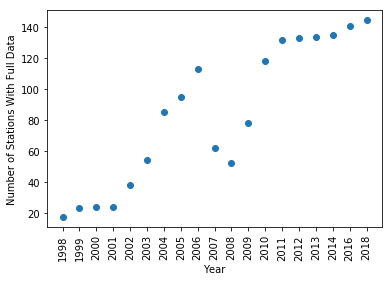

In [5]:
years = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2016', '2018']

import os
import glob

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

master = {}
for year in years:
    master[year] = []
    gl = glob.glob(".\\%s\\*.txt" % year)
    for i in gl:
        master[year].append(file_len(i))

from collections import Counter

dataset_size = [sum([j for i, j in Counter(v).most_common(3)]) for k, v in master.items()]

x = [i for i in range(19)]
plt.scatter(years, dataset_size, )
plt.ylabel("Number of Stations With Full Data")
plt.xlabel("Year")
plt.xticks(x, years, rotation='vertical')
plt.savefig("ASOSstations.png")